### Student Information:
### ● Name :Snehal Sunil Bankar
### ● Roll Number:202201070020
### ● Batch:T1

# MLP With Sklearn

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.60      0.23      0.33        13

    accuracy                           0.70        40
   macro avg       0.66      0.58      0.57        40
weighted avg       0.68      0.70      0.65        40



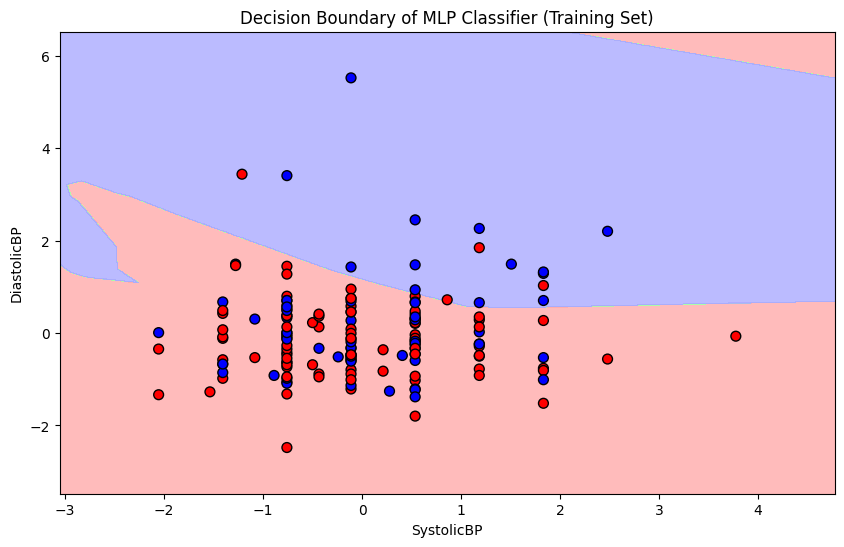

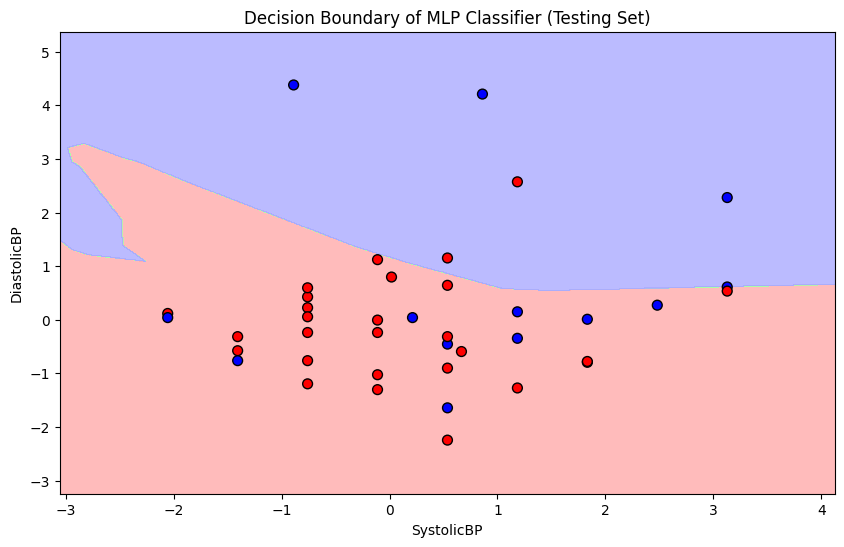

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/heart (1).csv')

# Drop missing values
df.dropna(inplace=True)

# Encode target variable (HeartDisease)
le = LabelEncoder()
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])

# Select relevant features and target
X = df[['RestingBP', 'Cholesterol']]
y = df['HeartDisease']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light shades for background
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for points

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, dataset_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(f"Decision Boundary of MLP Classifier ({dataset_type} Set)")
    plt.xlabel("SystolicBP")
    plt.ylabel("DiastolicBP")
    plt.show()

# Convert y_train and y_test to NumPy arrays (ensures compatibility)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, mlp, "Training")

# Plot decision boundary for testing set
plot_decision_boundary(X_test, y_test, mlp, "Testing")


# Keras Implemenation

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:

# Load dataset
df = pd.read_csv('/content/heart (1).csv')
# Extract features and target
X = df.iloc[:, 1:8].values
y = df["HeartDisease"].values  # Target labels

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
# - StandardScaler is used to normalize the features by removing the mean and scaling to unit variance
# - This helps the neural network converge faster and improves performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)        # Transform the testing data using the same scaler

In [ ]:

model = Sequential([
    Dense(20, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(8, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.5940 - loss: 0.7932 - val_accuracy: 0.3333 - val_loss: 0.9090
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6286 - loss: 0.7551 - val_accuracy: 0.4444 - val_loss: 0.8901
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6475 - loss: 0.7432 - val_accuracy: 0.5000 - val_loss: 0.8705
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6274 - loss: 0.7299 - val_accuracy: 0.5000 - val_loss: 0.8513
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6659 - loss: 0.7168 - val_accuracy: 0.5000 - val_loss: 0.8328
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7373 - loss: 0.6928 - val_accuracy: 0.5556 - val_loss: 0.8152
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6983 - loss: 0.7140 - val_accuracy: 0.6111 - val_loss: 0.7989
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7596 - loss: 0.6822 - val_accuracy: 0.6111 - val_loss: 0.7843

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6818 - loss: 0.6500
Test Loss: 0.6500
Test Accuracy: 0.6818


In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step



Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.30      0.46        10

    accuracy                           0.68        22
   macro avg       0.82      0.65      0.62        22
weighted avg       0.80      0.68      0.63        22



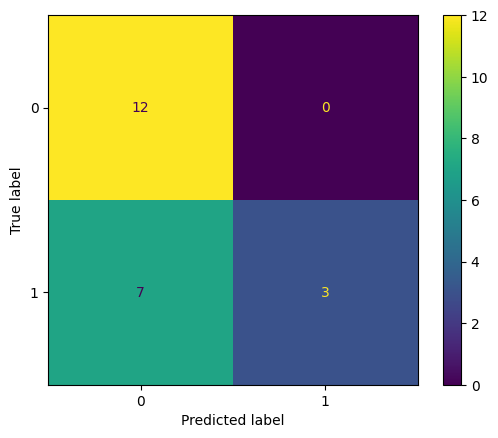

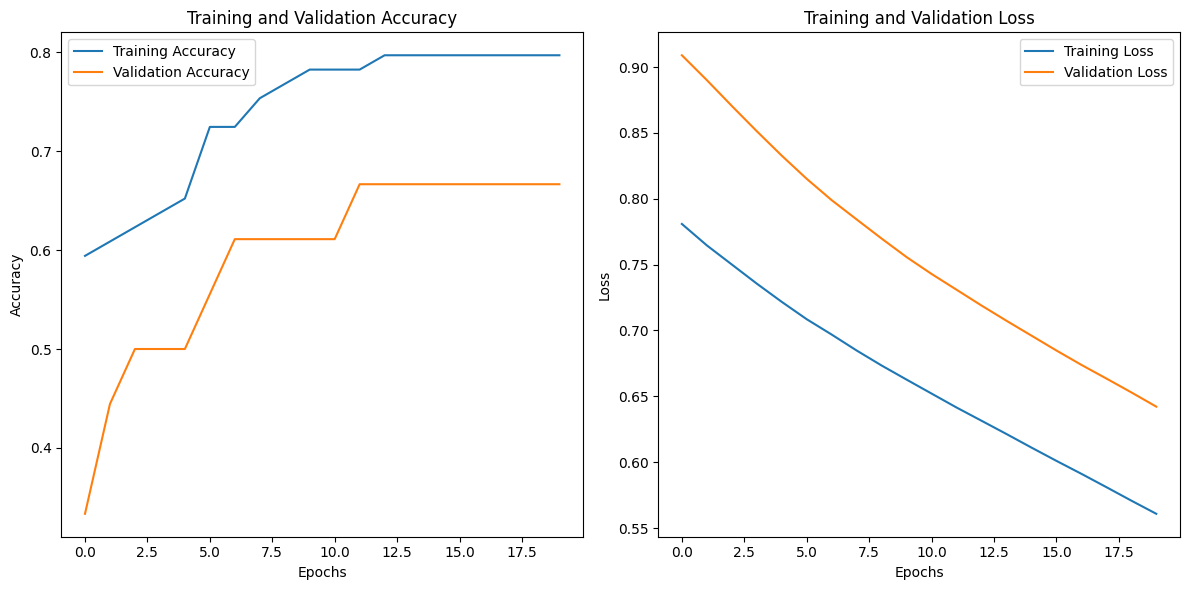

In [ ]:

# Step 7: Classification Report
# Print a detailed classification report with precision, recall, F1-score, and support for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
# Plot the confusion matrix to visualize model performance in terms of true positives, true negatives, false positives, and false negatives
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


#ANN with Backpropagation

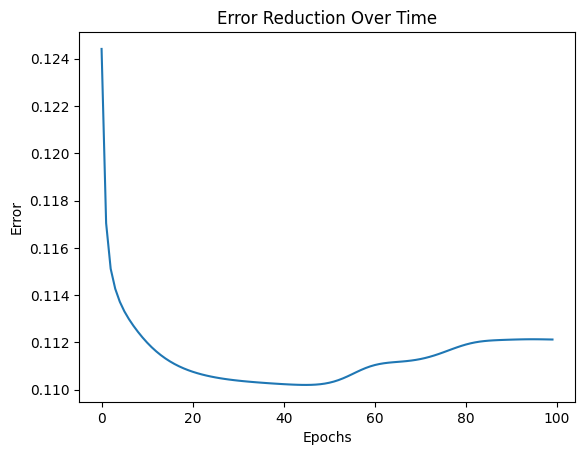

Final Training Error: 0.11212041800931363


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "/content/heart (1).csv"
df = pd.read_csv(file_path)



# Separate features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Forward pass
def activation(bias, weights, inputs):
    summation = bias + np.dot(weights, inputs)
    return sigmoid(summation)

# Form layers recursively
def form_layers(bias, weights, inputs, layer, index):
    if index >= len(weights):
        return
    neuron_output = activation(bias, weights[index:index+len(inputs)], inputs)
    layer.append(neuron_output)
    form_layers(bias, weights, inputs, layer, index + len(inputs))

# Feed forward
def feed_forward(bias1, bias2, w1, w2, inputs, hidden, output):
    form_layers(bias1, w1, inputs, hidden, 0)
    form_layers(bias2, w2, hidden, output, 0)

# Calculate error
def find_error(output, desired):
    return sum((output[i] - desired[i]) ** 2 for i in range(len(output))) / 2

# Backpropagation
def back_propagate(w1, w2, hidden, output, desired, alpha, inputs):
    differentiated = [-(desired[i] - output[i]) * (output[i] * (1 - output[i])) for i in range(len(output))]

    # Update Layer 1 weights
    for i in range(len(w1)):
        temp = sum(differentiated[j] * w2[j] for j in range(len(output)))
        temp *= hidden[i // len(inputs)] * (1 - hidden[i // len(inputs)])
        temp *= inputs[i % len(inputs)]
        w1[i] -= alpha * temp

    # Update Layer 2 weights
    for i in range(len(w2)):
        w2[i] -= alpha * differentiated[i // len(hidden)] * hidden[i % len(hidden)]

# Initialize weights and biases
input_size = X_train.shape[1]
hidden_size = 5  # Adjustable hidden layer size
output_size = 1

w1 = np.random.rand(hidden_size * input_size).tolist()
w2 = np.random.rand(output_size * hidden_size).tolist()
b1, b2 = np.random.rand(), np.random.rand()

# Training parameters
epochs = 100
alpha = 0.5
errors = []

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_train)):
        output, hidden = [], []
        feed_forward(b1, b2, w1, w2, X_train[i], hidden, output)
        total_error += find_error(output, [y_train.iloc[i]])
        back_propagate(w1, w2, hidden, output, [y_train.iloc[i]], alpha, X_train[i])
    errors.append(total_error / len(X_train))

# Plot error reduction
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction Over Time")
plt.show()

# Output the final error
print("Final Training Error:", errors[-1])
